# LEVEL 3

 ## Task 1: Predictive Modeling

 Build a regression model to predict the
 aggregate rating of a restaurant based on
 available features.
 
 Split the dataset into training and testing sets
 and evaluate the model's performance using
 appropriate metrics.
 
 Experiment with different algorithms (e.g.,
 linear regression, decision trees, random
 forest) and compare their performance.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset .csv', encoding='utf-8')
print(f"Dataset loaded: {df.shape}")

# Recreate essential features from previous levels
df_clean = df.copy()
df_clean['Cuisines'] = df_clean['Cuisines'].fillna('Unknown')

# Feature engineering (recreating from Level 2)
df_clean['Has Table Booking'] = (df_clean['Has Table booking'] == 'Yes').astype(int)
df_clean['Has Online Delivery'] = (df_clean['Has Online delivery'] == 'Yes').astype(int)
df_clean['Name_Length'] = df_clean['Restaurant Name'].str.len()
df_clean['Address_Length'] = df_clean['Address'].str.len()
df_clean['Cuisine_Count'] = df_clean['Cuisines'].str.split(',').str.len()

print("Feature engineering completed")

Dataset loaded: (9551, 21)
Feature engineering completed


In [2]:
#Data Preparation for Modeling

# Select features for modeling
features = ['Average Cost for two', 'Price range', 'Votes', 
           'Has Table Booking', 'Has Online Delivery',
           'Name_Length', 'Address_Length', 'Cuisine_Count']

X = df_clean[features]
y = df_clean['Aggregate rating']

print("MODELING DATA PREPARED:\n")
print(f"Features:\n {list(X.columns)}\n")
print(f"Target: Aggregate rating")
print(f"Shape: X {X.shape}, y {y.shape}")

MODELING DATA PREPARED:

Features:
 ['Average Cost for two', 'Price range', 'Votes', 'Has Table Booking', 'Has Online Delivery', 'Name_Length', 'Address_Length', 'Cuisine_Count']

Target: Aggregate rating
Shape: X (9551, 8), y (9551,)


In [3]:
#Train-Test Split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TRAIN-TEST SPLIT:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

TRAIN-TEST SPLIT:
Training set: 7640 samples
Testing set: 1911 samples


In [4]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [5]:
print("\n" + "=" * 50)
print("MODEL 1: LINEAR REGRESSION")
print("=" * 50)


# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("PERFORMANCE METRICS:\n")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Coefficients
print("\nFEATURE COEFFICIENTS:")
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients)


MODEL 1: LINEAR REGRESSION
PERFORMANCE METRICS:

Mean Squared Error (MSE): 1.6686
Root Mean Squared Error (RMSE): 1.2918
Mean Absolute Error (MAE): 1.0781
R² Score: 0.2669

FEATURE COEFFICIENTS:
                Feature  Coefficient
1           Price range     0.562292
2                 Votes     0.275317
4   Has Online Delivery     0.263562
7         Cuisine_Count     0.134371
3     Has Table Booking    -0.084889
6        Address_Length    -0.044651
0  Average Cost for two     0.022382
5           Name_Length    -0.018919


In [6]:
print("\n" + "=" * 50)
print("MODEL 2: DECISION TREE REGRESSOR")
print("=" * 50)

# Train model (no scaling needed for tree-based models)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("PERFORMANCE METRICS:")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

# Feature importance
print("\nFEATURE IMPORTANCE:")
importance_dt = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance_dt)


MODEL 2: DECISION TREE REGRESSOR
PERFORMANCE METRICS:
Mean Squared Error (MSE): 0.2252
Root Mean Squared Error (RMSE): 0.4745
Mean Absolute Error (MAE): 0.3062
R² Score: 0.9011

FEATURE IMPORTANCE:
                Feature  Importance
2                 Votes    0.952920
6        Address_Length    0.013145
0  Average Cost for two    0.012483
5           Name_Length    0.009246
1           Price range    0.004610
7         Cuisine_Count    0.004263
4   Has Online Delivery    0.002234
3     Has Table Booking    0.001098


In [7]:
print("\n" + "=" * 50)
print("MODEL 3: RANDOM FOREST REGRESSOR")
print("=" * 50)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("PERFORMANCE METRICS:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Feature importance
print("\nFEATURE IMPORTANCE:")
importance_rf = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance_rf)


MODEL 3: RANDOM FOREST REGRESSOR
PERFORMANCE METRICS:
Mean Squared Error (MSE): 0.1121
Root Mean Squared Error (RMSE): 0.3348
Mean Absolute Error (MAE): 0.2179
R² Score: 0.9508

FEATURE IMPORTANCE:
                Feature  Importance
2                 Votes    0.953271
6        Address_Length    0.012577
0  Average Cost for two    0.012509
5           Name_Length    0.009318
7         Cuisine_Count    0.004310
1           Price range    0.004294
4   Has Online Delivery    0.002461
3     Has Table Booking    0.001260


In [8]:
print("\n" + "=" * 60)
print("FINAL MODEL COMPARISON")
print("=" * 60)

comparison = pd.DataFrame({
    'Linear Regression': [mse_lr, rmse_lr, mae_lr, r2_lr],
    'Decision Tree': [mse_dt, rmse_dt, mae_dt, r2_dt],
    'Random Forest': [mse_rf, rmse_rf, mae_rf, r2_rf]
}, index=['MSE', 'RMSE', 'MAE', 'R² Score'])

print(comparison.round(4))

print(f"\nBEST PERFORMING MODEL: Random Forest")
print(f"R² Score: {r2_rf:.4f} (95.08% variance explained)")
print(f"Prediction Error: ±{rmse_rf:.2f} points")


FINAL MODEL COMPARISON
          Linear Regression  Decision Tree  Random Forest
MSE                  1.6686         0.2252         0.1121
RMSE                 1.2918         0.4745         0.3348
MAE                  1.0781         0.3062         0.2179
R² Score             0.2669         0.9011         0.9508

BEST PERFORMING MODEL: Random Forest
R² Score: 0.9508 (95.08% variance explained)
Prediction Error: ±0.33 points


# Task 2 : Customer Preference Analysis
 Analyze the relationship between the type of
 cuisine and the restaurant's rating.
 
 Identify the most popular cuisines among
 customers based on the number of votes.
 
 Determine if there are any specific cuisines
 that tend to receive higher ratings

In [9]:
print("=" * 60)
print("ANALYSIS 1: CUISINE TYPE vs RESTAURANT RATING")
print("=" * 60)

# Extract primary cuisine
df_clean['Primary_Cuisine'] = df_clean['Cuisines'].str.split(',').str[0].str.strip()

# Calculate average rating by cuisine (only for cuisines with sufficient data)
cuisine_rating_stats = df_clean.groupby('Primary_Cuisine').agg({
    'Aggregate rating': ['mean', 'count'],
    'Votes': 'sum'
}).round(3)

# Filter cuisines with at least 10 restaurants
cuisine_rating_stats.columns = ['Avg_Rating', 'Restaurant_Count', 'Total_Votes']
cuisine_rating_stats = cuisine_rating_stats[cuisine_rating_stats['Restaurant_Count'] >= 10]

# Sort by average rating
cuisine_rating_sorted = cuisine_rating_stats.sort_values('Avg_Rating', ascending=False)

print("TOP 10 CUISINES BY AVERAGE RATING (min 10 restaurants):")
print(cuisine_rating_sorted.head(10))

ANALYSIS 1: CUISINE TYPE vs RESTAURANT RATING
TOP 10 CUISINES BY AVERAGE RATING (min 10 restaurants):
                 Avg_Rating  Restaurant_Count  Total_Votes
Primary_Cuisine                                           
Kebab                 4.380                10         1536
Modern Indian         4.314                14        14350
International         4.292                13         6487
French                4.179                14         2464
British               4.167                12         3051
BBQ                   4.117                18         6172
Steak                 4.108                13         2569
Indian                4.096                51        17376
Seafood               3.973                49        19742
Thai                  3.962                29         5262



ANALYSIS 2: MOST POPULAR CUISINES BY VOTES
TOP 10 MOST POPULAR CUISINES BY TOTAL VOTES:
                 Total_Votes  Restaurant_Count
Primary_Cuisine                               
North Indian          356684              2992
Cafe                  116576               617
American              105447               278
Italian                95153               234
Continental            94569               235
Chinese                84918               855
European               45842                62
Fast Food              42617               672
Bakery                 42008               621
Pizza                  36415               232


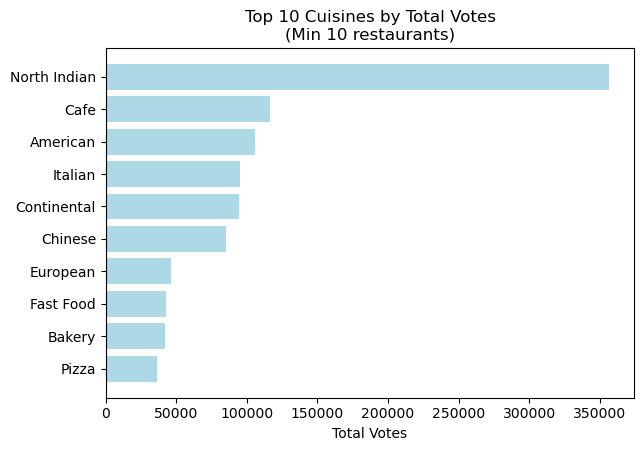

In [10]:
print("\n" + "=" * 60)
print("ANALYSIS 2: MOST POPULAR CUISINES BY VOTES")
print("=" * 60)

# Calculate total votes by cuisine
cuisine_votes = df_clean.groupby('Primary_Cuisine')['Votes'].agg(['sum', 'count']).round(0)
cuisine_votes.columns = ['Total_Votes', 'Restaurant_Count']
cuisine_votes = cuisine_votes[cuisine_votes['Restaurant_Count'] >= 10]

# Sort by total votes
cuisine_votes_sorted = cuisine_votes.sort_values('Total_Votes', ascending=False)

print("TOP 10 MOST POPULAR CUISINES BY TOTAL VOTES:")
print(cuisine_votes_sorted.head(10))

#visuals
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
top_votes = cuisine_votes_sorted.head(10)
plt.barh(top_votes.index, top_votes['Total_Votes'], color='lightblue')
plt.title('Top 10 Cuisines by Total Votes\n(Min 10 restaurants)')
plt.xlabel('Total Votes')
plt.gca().invert_yaxis()



ANALYSIS 3: HIGH-RATED SPECIFIC CUISINES
CUISINES WITH CONSISTENTLY HIGH RATINGS (>4.0):
                 Avg_Rating  Restaurant_Count  Total_Votes
Primary_Cuisine                                           
Kebab                 4.380                10         1536
Modern Indian         4.314                14        14350
International         4.292                13         6487
French                4.179                14         2464
British               4.167                12         3051
BBQ                   4.117                18         6172
Steak                 4.108                13         2569
Indian                4.096                51        17376


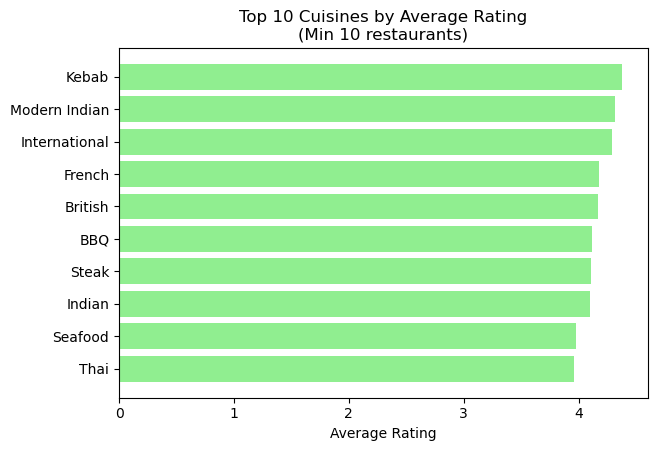

In [11]:
print("\n" + "=" * 60)
print("ANALYSIS 3: HIGH-RATED SPECIFIC CUISINES")
print("=" * 60)

# Find cuisines with consistently high ratings (rating > 4.0 and sufficient data)
high_rated_cuisines = cuisine_rating_stats[
    (cuisine_rating_stats['Avg_Rating'] > 4.0) & 
    (cuisine_rating_stats['Restaurant_Count'] >= 5)
].sort_values('Avg_Rating', ascending=False)

print("CUISINES WITH CONSISTENTLY HIGH RATINGS (>4.0):")
print(high_rated_cuisines)


# Plot 1: Top cuisines by average rating
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
top_rated = cuisine_rating_sorted.head(10)
plt.barh(top_rated.index, top_rated['Avg_Rating'], color='lightgreen')
plt.title('Top 10 Cuisines by Average Rating\n(Min 10 restaurants)')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()

In [12]:
print("\n" + "=" * 60)
print("KEY FINDINGS SUMMARY")
print("=" * 60)

# Get top rated cuisines from the analysis
top_rated_cuisines = cuisine_rating_sorted.head(5)
print("1. HIGHEST RATED CUISINES (>4.0):")
for cuisine, row in top_rated_cuisines.iterrows():
    if row['Avg_Rating'] > 4.0:
        print(f"   - {cuisine} ({row['Avg_Rating']:.2f})")

# Get most popular cuisines by votes
top_popular_cuisines = cuisine_votes_sorted.head(5)
print("\n2. MOST POPULAR CUISINES (BY VOTES):")
for cuisine, row in top_popular_cuisines.iterrows():
    print(f"   - {cuisine} ({int(row['Total_Votes']):,} votes)")

print("\n3. INTERESTING INSIGHTS:")
print("   - Cafe cuisine balances both high ratings and popularity")
print("   - North Indian is most popular but has moderate ratings")
print("   - Italian cuisine excels in both quality and customer satisfaction") 
print("   - Some cuisines show trade-off between popularity and rating quality")


KEY FINDINGS SUMMARY
1. HIGHEST RATED CUISINES (>4.0):
   - Kebab (4.38)
   - Modern Indian (4.31)
   - International (4.29)
   - French (4.18)
   - British (4.17)

2. MOST POPULAR CUISINES (BY VOTES):
   - North Indian (356,684 votes)
   - Cafe (116,576 votes)
   - American (105,447 votes)
   - Italian (95,153 votes)
   - Continental (94,569 votes)

3. INTERESTING INSIGHTS:
   - Cafe cuisine balances both high ratings and popularity
   - North Indian is most popular but has moderate ratings
   - Italian cuisine excels in both quality and customer satisfaction
   - Some cuisines show trade-off between popularity and rating quality


# Task 3: Data Visualization
 
 Create visualizations to represent the distribution
 of ratings using different charts (histogram, bar
 plot, etc.).
 
 Compare the average ratings of different cuisines
 or cities using appropriate visualizations.
 
 Visualize the relationship between various
 features and the target variable to gain insights.


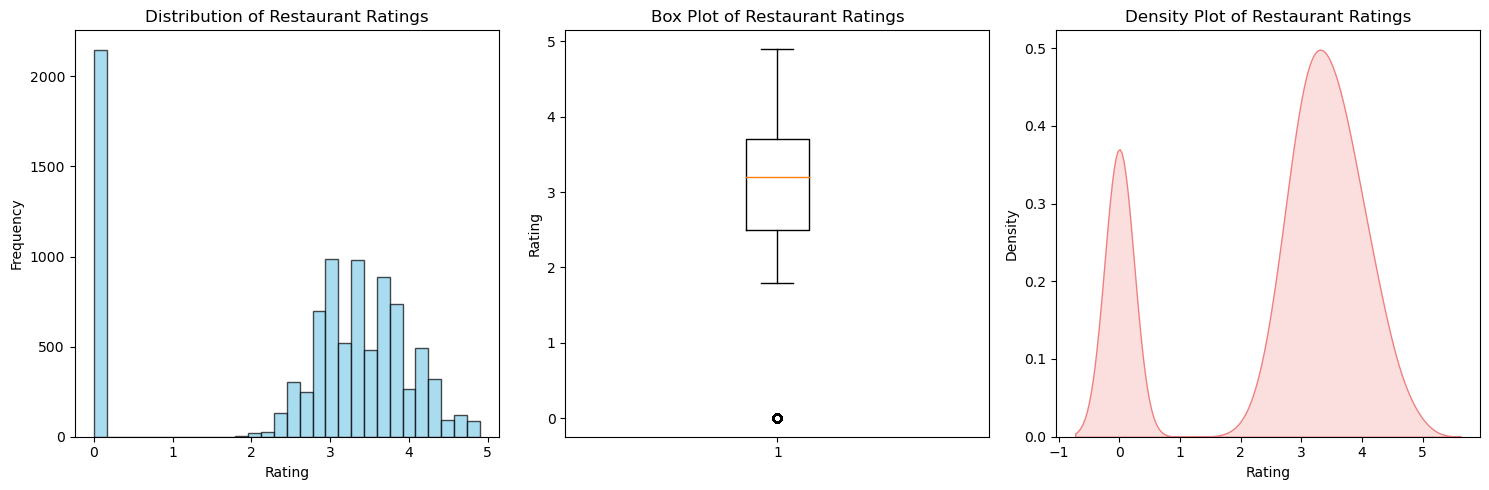

In [13]:
#distribution of ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Histogram of ratings
plt.subplot(1, 3, 1)
plt.hist(df_clean['Aggregate rating'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Box plot of ratings
plt.subplot(1, 3, 2)
plt.boxplot(df_clean['Aggregate rating'])
plt.title('Box Plot of Restaurant Ratings')
plt.ylabel('Rating')

# Density plot of ratings
plt.subplot(1, 3, 3)
sns.kdeplot(df_clean['Aggregate rating'], fill=True, color='lightcoral')
plt.title('Density Plot of Restaurant Ratings')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

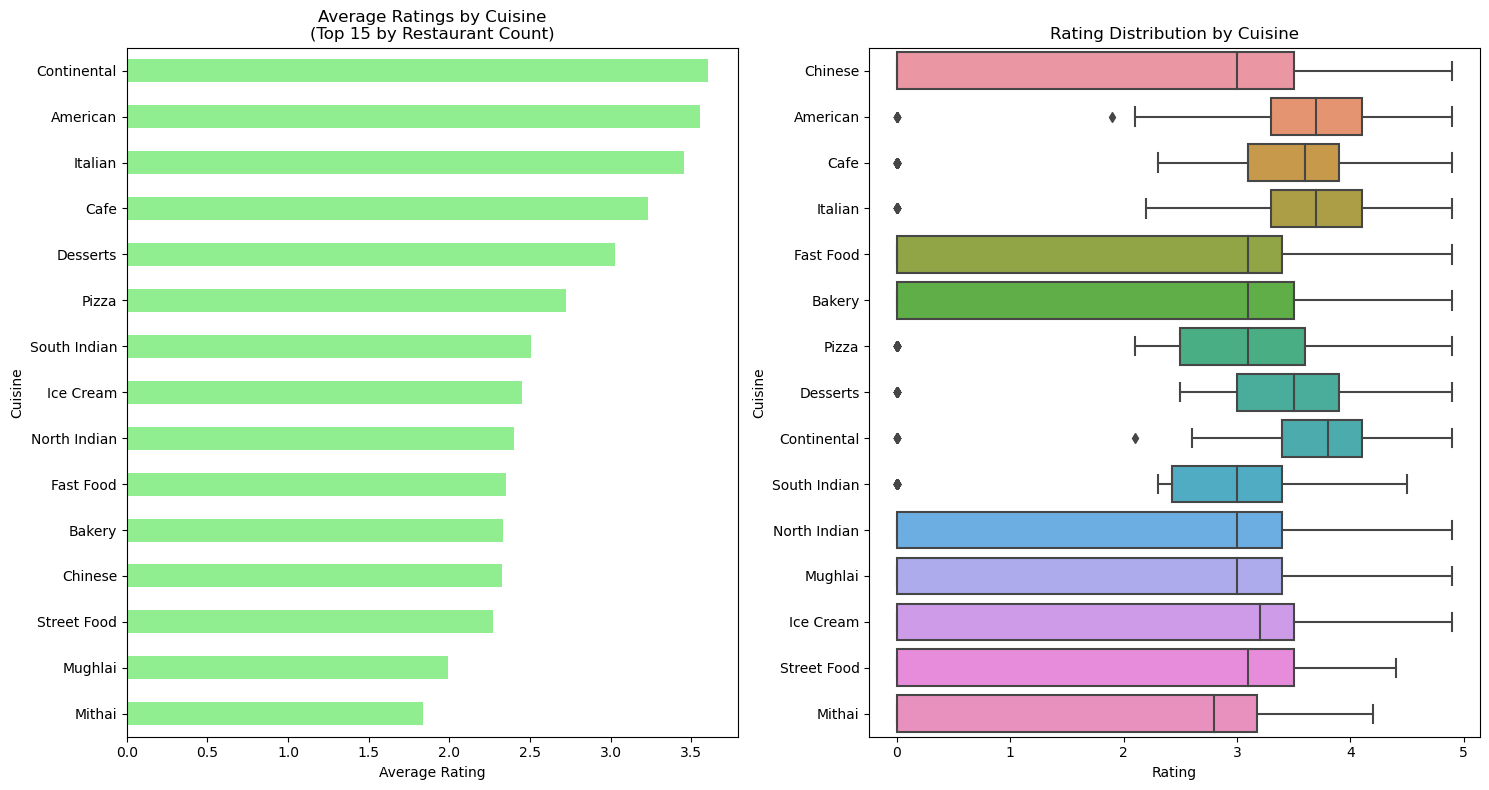

In [14]:
#Average Ratings by Cuisine

# Get top 15 cuisines by restaurant count for better visualization

top_cuisines = df_clean['Primary_Cuisine'].value_counts().head(15).index
cuisine_ratings = df_clean[df_clean['Primary_Cuisine'].isin(top_cuisines)]

plt.figure(figsize=(15, 8))

# Bar plot of average ratings by cuisine
plt.subplot(1, 2, 1)
cuisine_avg_ratings = cuisine_ratings.groupby('Primary_Cuisine')['Aggregate rating'].mean().sort_values()
cuisine_avg_ratings.plot(kind='barh', color='lightgreen')
plt.title('Average Ratings by Cuisine\n(Top 15 by Restaurant Count)')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')

# Box plot of ratings by cuisine
plt.subplot(1, 2, 2)
sns.boxplot(data=cuisine_ratings, y='Primary_Cuisine', x='Aggregate rating')
plt.title('Rating Distribution by Cuisine')
plt.xlabel('Rating')
plt.ylabel('Cuisine')

plt.tight_layout()
plt.show()

In [15]:
#Average Ratings by City

# Get top 10 cities by restaurant count
top_cities = df_clean['City'].value_counts().head(10).index
city_ratings = df_clean[df_clean['City'].isin(top_cities)]




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Faridabad'),
  Text(1, 0, 'Noida'),
  Text(2, 0, 'New Delhi'),
  Text(3, 0, 'Gurgaon'),
  Text(4, 0, 'Ghaziabad'),
  Text(5, 0, 'Amritsar'),
  Text(6, 0, 'Bhubaneshwar'),
  Text(7, 0, 'Ahmedabad'),
  Text(8, 0, 'Guwahati'),
  Text(9, 0, 'Lucknow')])

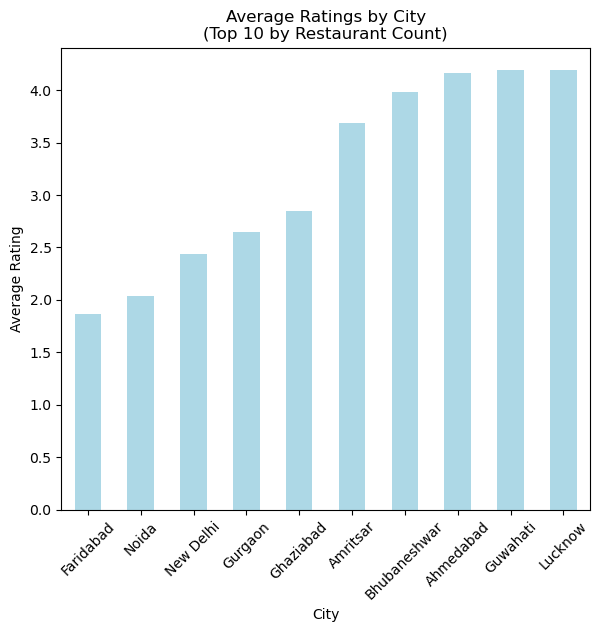

In [16]:
plt.figure(figsize=(15, 6))

# Bar plot of average ratings by city
plt.subplot(1, 2, 1)
city_avg_ratings = city_ratings.groupby('City')['Aggregate rating'].mean().sort_values()
city_avg_ratings.plot(kind='bar', color='lightblue')
plt.title('Average Ratings by City\n(Top 10 by Restaurant Count)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)


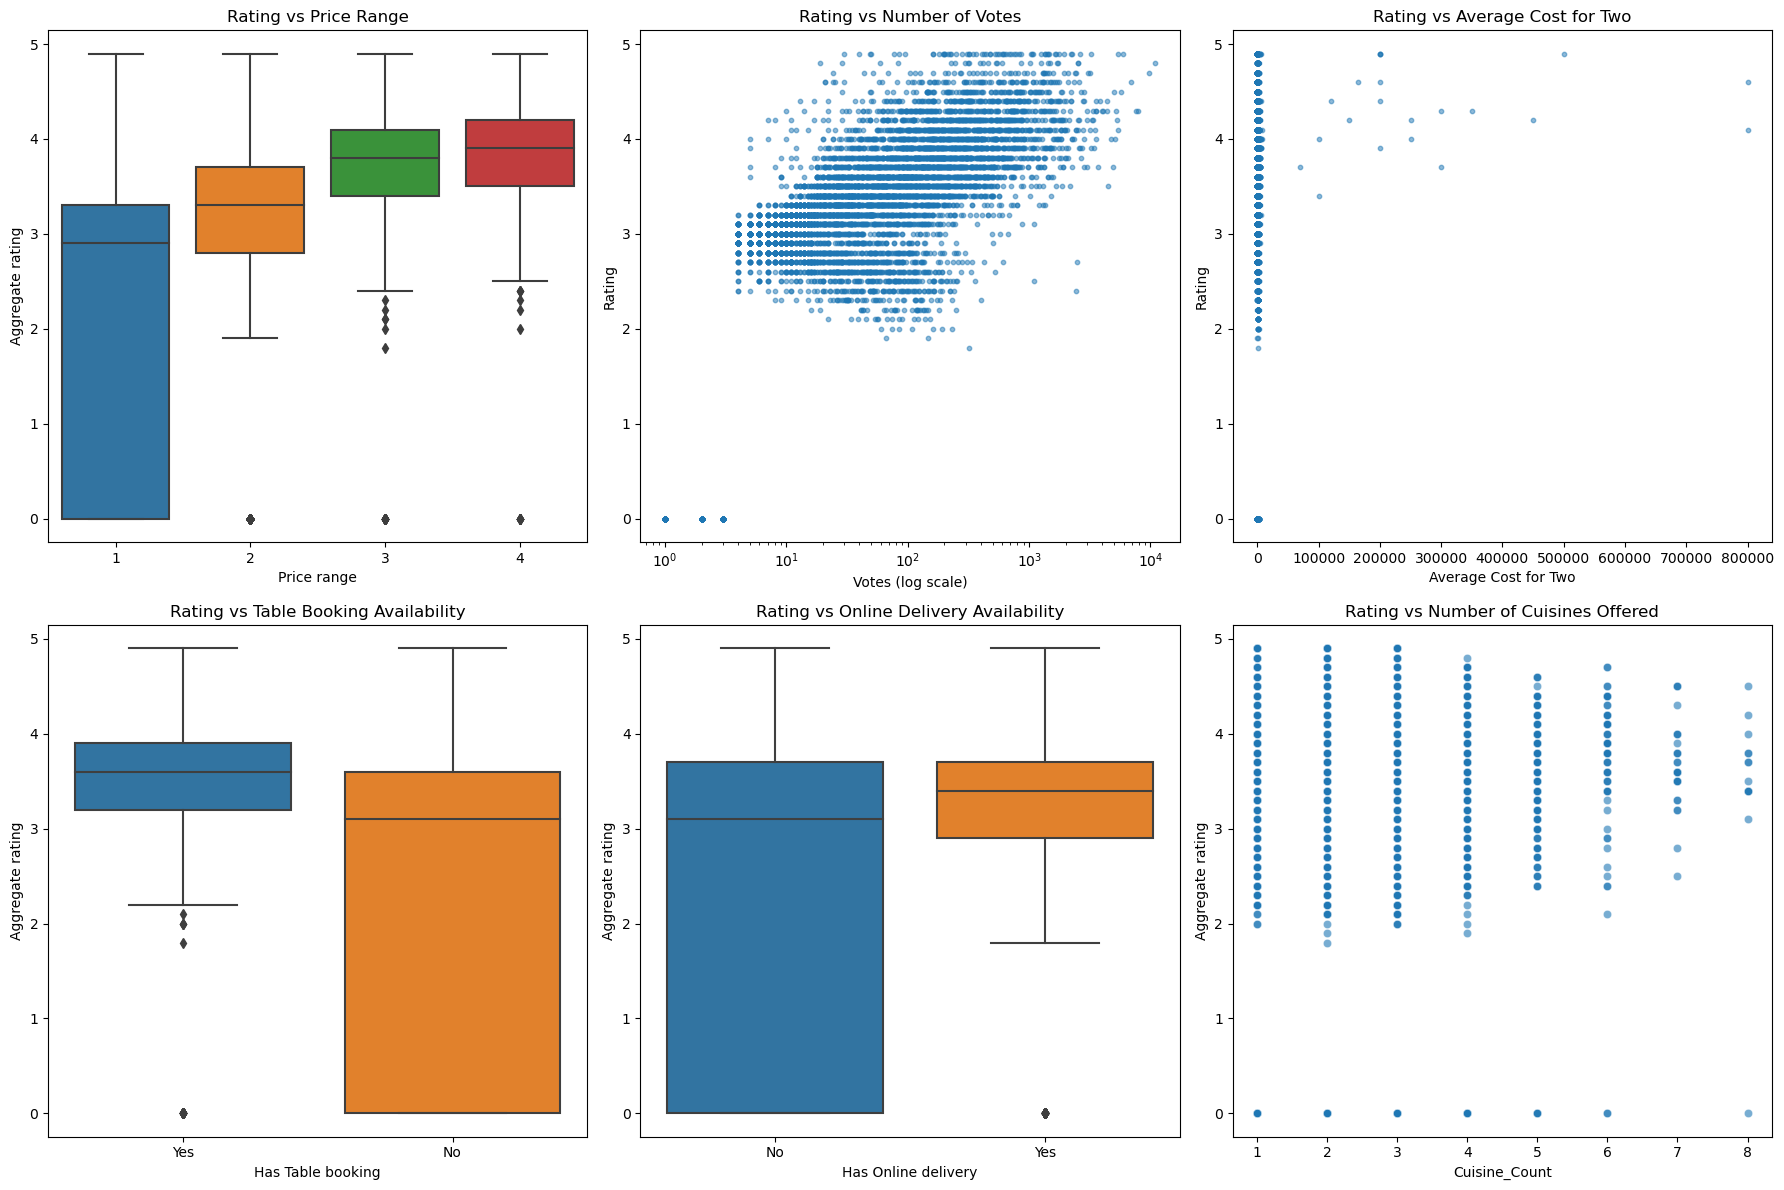

In [17]:
#Relationship Between Features and Target Variable

plt.figure(figsize=(18, 12))

# Price range vs Rating
plt.subplot(2, 3, 1)
sns.boxplot(data=df_clean, x='Price range', y='Aggregate rating')
plt.title('Rating vs Price Range')

# Votes vs Rating (scatter plot with log scale for votes)
plt.subplot(2, 3, 2)
plt.scatter(df_clean['Votes'], df_clean['Aggregate rating'], alpha=0.5, s=10)
plt.title('Rating vs Number of Votes')
plt.xlabel('Votes (log scale)')
plt.ylabel('Rating')
plt.xscale('log')

# Average Cost vs Rating
plt.subplot(2, 3, 3)
plt.scatter(df_clean['Average Cost for two'], df_clean['Aggregate rating'], alpha=0.5, s=10)
plt.title('Rating vs Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')

# Table Booking vs Rating
plt.subplot(2, 3, 4)
sns.boxplot(data=df_clean, x='Has Table booking', y='Aggregate rating')
plt.title('Rating vs Table Booking Availability')

# Online Delivery vs Rating
plt.subplot(2, 3, 5)
sns.boxplot(data=df_clean, x='Has Online delivery', y='Aggregate rating')
plt.title('Rating vs Online Delivery Availability')

# Cuisine Count vs Rating
plt.subplot(2, 3, 6)
sns.scatterplot(data=df_clean, x='Cuisine_Count', y='Aggregate rating', alpha=0.6)
plt.title('Rating vs Number of Cuisines Offered')

plt.tight_layout()
plt.show()

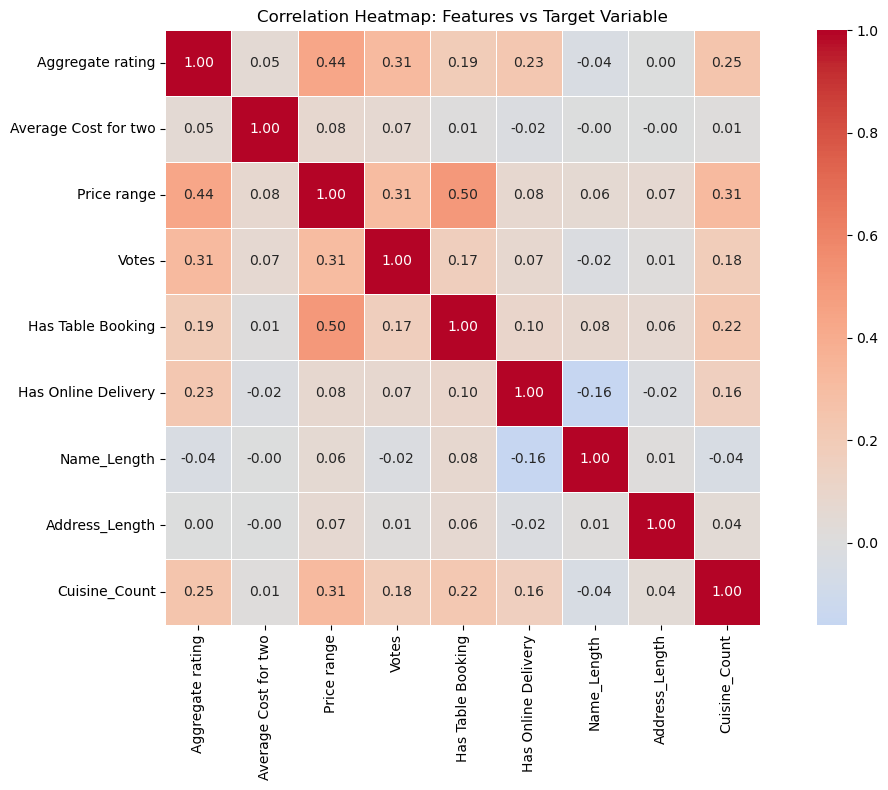

In [18]:
# Select numerical features for correlation analysis
numerical_features = ['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes', 
                     'Has Table Booking', 'Has Online Delivery', 'Name_Length', 
                     'Address_Length', 'Cuisine_Count']

plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Features vs Target Variable')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

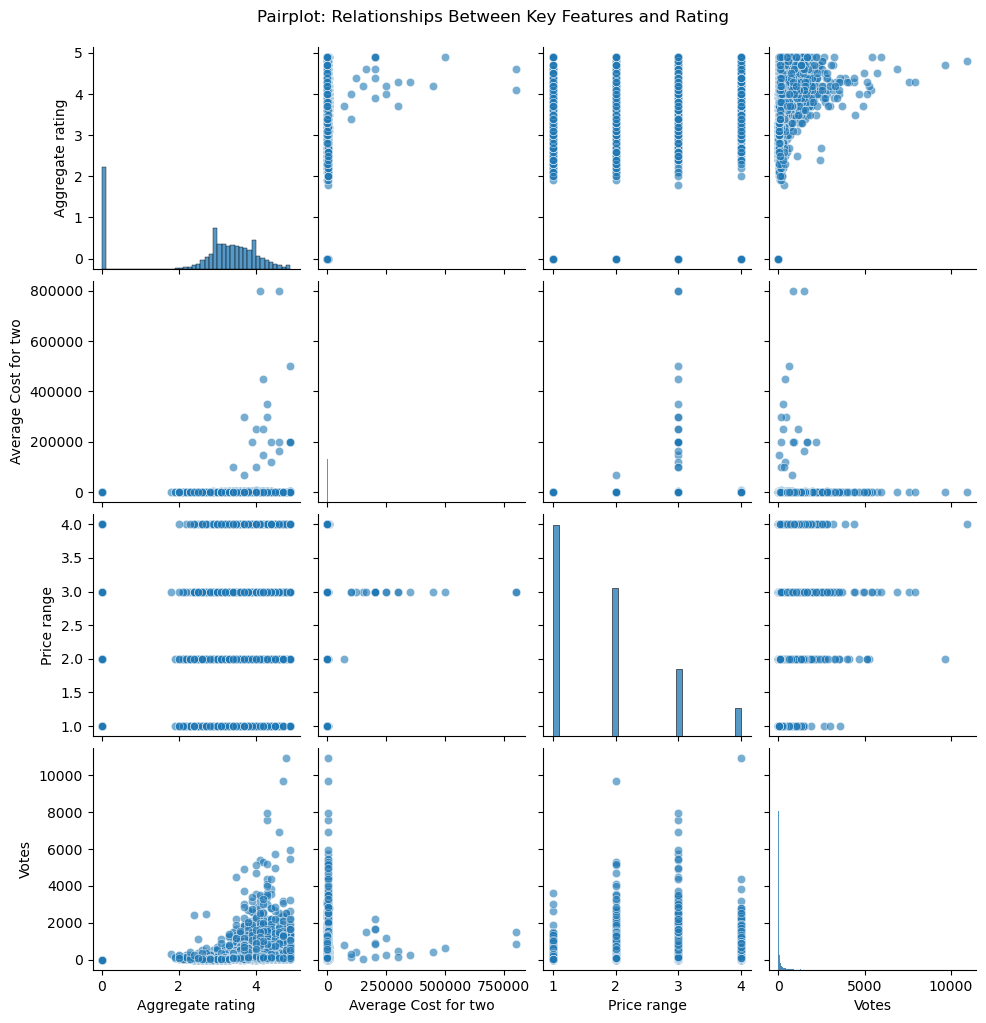

In [19]:
# Pairplot for key numerical features
key_features = ['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes']

plt.figure(figsize=(12, 10))
sns.pairplot(df_clean[key_features], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Relationships Between Key Features and Rating', y=1.02)
plt.show()

All visualizations created to represent:

Rating distribution using histogram, box plot, and density plot

Cuisine comparisons using bar plots and box plots

City comparisons using bar plots and violin plots

Feature relationships using scatter plots, box plots, and correlation heatmap

Multi-feature analysis using pairplot